<a href="https://colab.research.google.com/github/Khalidzo/digit-recognition/blob/main/Make_your_own_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
class neuralNetwork:
  def __init__(self, input, hidden, output, learning_rate):
      # NN dimensions
      self.input = input
      self.hidden = hidden
      self.output = output

      # define learning_rate
      self.lr = learning_rate

      # initialize weights
      self.wih = np.random.rand(self.hidden, self.input) - 0.5
      self.who = np.random.rand(self.output, self.hidden) - 0.5

      # output function
      self.activation_function = lambda x: scipy.special.expit(x)

  def train(self, inputs_list, targets_list):
      inputs = np.array(input_list, ndmin=2).T
      targets = np.array(input_list, ndmin=2).T

      # feed input to the hidden layer
      hidden_inputs = np.dot(self.wih, inputs)
      hidden_outputs = self.activation_function(hidden_inputs)

      # feed input to the output(final) layer
      final_inputs = np.dot(self.who, hidden_outputs)
      final_outputs = self.activation_function(final_inputs)

      # calculate error
      output_errors = targets - final_outputs
      hidden_errors = np.dot(self.who.T, output_errors)

      # update the weights
      self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
      self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(hidden_outputs))

  def query(self, inputs_list):
      # convert input to 2D array
      inputs = np.array(inputs_list, ndmin=2).T

      # feed input to the hidden layer
      hidden_inputs = np.dot(self.wih, inputs)
      hidden_outputs = self.activation_function(hidden_inputs)

      # feed input to the output(final) layer
      final_inputs = np.dot(self.who, hidden_outputs)
      final_outputs = self.activation_function(final_inputs)

      return final_outputs

In [4]:
data_file = open('/content/mnist_dataset/mnist_test_10.csv', 'r')
data_list = data_file.readlines()
data_file.close()

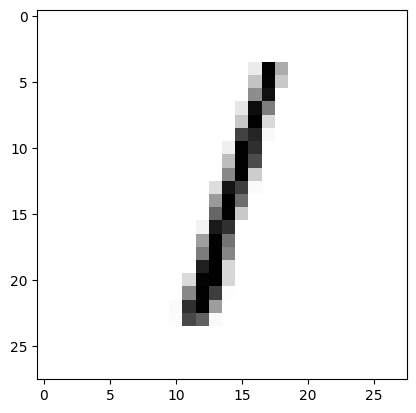

In [5]:
all_values = data_list[2].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [6]:
# layers
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

# set learning rate
learning_rate = 0.3

# instantiate the NN
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [7]:
n.query([1.0, 0.5, -0.5])

array([[0.57435327],
       [0.38932242],
       [0.58436497]])